In [4]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
af = pd.read_csv('./african-economic-outlook.csv')
af.head(3)

,Country and Regions,Country and Regions Name,Country and Regions - RegionId,Indicators,Indicators Name,Scale,Units,1980,1981,1982,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,DZA,Algeria,DZ,NY.GDP.MKTP.KD.ZG,Real GDP growth (annual %),units,percentage,NaN,3.000005,6.400001,...,2.900000,3.400000,2.800000,3.800000,3.700000,3.200000,1.40000,2.544479,2.689753,1.867171
1,DZA,Algeria,DZ,NY.GDP.PCAP.KD.ZG,Real per Capita GDP Growth Rate (annual %),units,percentage,NaN,-0.129448,3.131644,...,0.938334,1.345839,0.728063,1.743944,1.727994,1.333212,-0.34756,0.860358,1.075350,0.329201
2,DZA,Algeria,DZ,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,34512.32973,35547.701330,37822.754450,...,82306.010060,85104.414400,87487.338010,90811.856850,94171.895550,97185.396210,98545.99176,101053.473900,103771.562900,105709.155600


In [6]:
#profile = pandas_profiling.ProfileReport(af)

#profile

# Taking a look at the data

In [7]:
af.shape

(1732, 48)

In [8]:
af.columns

Index(['Country and Regions', 'Country and Regions Name',
       'Country and Regions - RegionId', 'Indicators', 'Indicators Name',
       'Scale', 'Units', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [9]:
pd.DataFrame(af.dtypes, columns=['Datatypes']).head(10)

,Datatypes
Country and Regions,object
Country and Regions Name,object
Country and Regions - RegionId,object
Indicators,object
Indicators Name,object
Scale,object
Units,object
1980,float64
1981,float64
1982,float64


# Renaming Columns

In [10]:
af.rename(columns={'Country and Regions': 'Country and Region ID', 'Country and Regions Name': 'Country Name', 'Country and Regions - RegionId': 'Region ID', 'Indicators': 'Indicator ID', 'Indicators Name': 'Indicator Name' }, inplace=True)

In [11]:
#af.rename(columns={'Country': 'Country Name'}, inplace=True)
af.head(1)

,Country and Region ID,Country Name,Region ID,Indicator ID,Indicator Name,Scale,Units,1980,1981,1982,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,DZA,Algeria,DZ,NY.GDP.MKTP.KD.ZG,Real GDP growth (annual %),units,percentage,NaN,3.000005,6.400001,...,2.9,3.4,2.8,3.8,3.7,3.2,1.4,2.544479,2.689753,1.867171


# Removing nulls



In [12]:
null_df = pd.DataFrame(af.isnull().sum(), columns=['Count of Nulls'])
null_df.index.name = 'Column'
null_df.sort_values(['Count of Nulls'], ascending=False).head(15)

,Count of Nulls
Column,
1980,341
Region ID,206
1981,170
1982,169
1983,167
1986,167
1984,167
1985,167
1988,165


In [13]:
saf = af.drop(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989'], axis=1)
saf.head(3)

Column,Country and Region ID,Country Name,Region ID,Indicator ID,Indicator Name,Scale,Units,1990,1991,1992,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,DZA,Algeria,DZ,NY.GDP.MKTP.KD.ZG,Real GDP growth (annual %),units,percentage,1.251756,-1.200000,1.60000,...,2.900000,3.400000,2.800000,3.800000,3.700000,3.200000,1.40000,2.544479,2.689753,1.867171
1,DZA,Algeria,DZ,NY.GDP.PCAP.KD.ZG,Real per Capita GDP Growth Rate (annual %),units,percentage,-1.306444,-3.588531,-0.74278,...,0.938334,1.345839,0.728063,1.743944,1.727994,1.333212,-0.34756,0.860358,1.075350,0.329201
2,DZA,Algeria,DZ,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,45860.019500,45309.699260,46034.65445,...,82306.010060,85104.414400,87487.338010,90811.856850,94171.895550,97185.396210,98545.99176,101053.473900,103771.562900,105709.155600


In [14]:
saf.fillna(value={ 'Region ID': 'No ID' }, inplace=True)

In [15]:
saf.tail(3)

Column,Country and Region ID,Country Name,Region ID,Indicator ID,Indicator Name,Scale,Units,1990,1991,1992,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1729,NaN,NaN,No ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1730,Source:,African Development Bank,No ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1731,Download URL:,http://dataportal.opendataforafrica.org/mhuicc...,No ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
aff = saf.loc[saf['Country Name'] == 'Eritrea']
afi = saf.drop(aff.index, axis=0)

## Removed Eritrea due to lack of data

In [17]:
#afi.drop([1731, 1730, 1729],axis=0, inplace = True)

In [18]:
afi.tail(2)

Column,Country and Region ID,Country Name,Region ID,Indicator ID,Indicator Name,Scale,Units,1990,1991,1992,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1730,Source:,African Development Bank,No ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1731,Download URL:,http://dataportal.opendataforafrica.org/mhuicc...,No ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Changing the data (long to wide and back)

In [19]:
af2 = afi.melt(id_vars=["Country and Region ID", "Country Name", "Region ID", "Indicator ID", "Indicator Name", "Scale", "Units"], 
        var_name="Year", 
        value_name="Value")




In [20]:
af2.tail(3)

,Country and Region ID,Country Name,Region ID,Indicator ID,Indicator Name,Scale,Units,Year,Value
52790,NaN,NaN,No ID,NaN,NaN,NaN,NaN,2020,NaN
52791,Source:,African Development Bank,No ID,NaN,NaN,NaN,NaN,2020,NaN
52792,Download URL:,http://dataportal.opendataforafrica.org/mhuicc...,No ID,NaN,NaN,NaN,NaN,2020,NaN


In [21]:
sample_with_replacement = af2.sample(n=5,replace=True)

In [22]:
sample_with_replacement

,Country and Region ID,Country Name,Region ID,Indicator ID,Indicator Name,Scale,Units,Year,Value
4206,LBY,Libya,LY,NE.GDI.PUB.ZS,"Gross capital formation, Public sector (% GDP)",units,Percentage of GDP,1992,16.803234
25039,SYC,Seychelles,SC,NE.GDI.PVTE.CD,"Gross capital formation, Private sector (curr...",millions,U.S. dollars,2004,144.265111
14161,ETH,Ethiopia,ET,NE.GDI.TOTL.ZS,Gross capital formation (% of GDP),units,Percentage of GDP,1998,19.048632
28974,DZA,Algeria,DZ,GC.BAL.CASH.GD.ZS,"Central government, Fiscal Balance (% of GDP)",units,Percentage of GDP,2007,4.884047
21317,MLI,Mali,ML,NE.IMP.GNFS.CD,Imports of goods and services (current US$),millions,U.S. dollars,2002,1101.018323


In [23]:
# algeria_1990 = af2[ (af2['Year'] == '1990') & (af2['Country Name'] == 'Algeria') ][['Indicator Name', 'Value']].transpose()

# labels = algeria_1990[0:1].to_numpy()[0]

# mapping_dict = {}
# for i, label in enumerate(labels):
#     mapping_dict[i] = label
    
# data = algeria_1990[1:2]

# data.rename(columns=mapping_dict)

In [24]:
 # af2.groupby(['Country and Regions Name', 'Indicators Name'])['Value'].aggregate('mean').unstack()

In [25]:
af2['Index'] = af2.index
af2.head(3)

,Country and Region ID,Country Name,Region ID,Indicator ID,Indicator Name,Scale,Units,Year,Value,Index
0,DZA,Algeria,DZ,NY.GDP.MKTP.KD.ZG,Real GDP growth (annual %),units,percentage,1990,1.251756,0
1,DZA,Algeria,DZ,NY.GDP.PCAP.KD.ZG,Real per Capita GDP Growth Rate (annual %),units,percentage,1990,-1.306444,1
2,DZA,Algeria,DZ,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,1990,45860.019500,2


In [26]:
af2018 = af2[af2['Year'] == '2018' ]

In [27]:
af2018.head(3)

,Country and Region ID,Country Name,Region ID,Indicator ID,Indicator Name,Scale,Units,Year,Value,Index
47684,DZA,Algeria,DZ,NY.GDP.MKTP.KD.ZG,Real GDP growth (annual %),units,percentage,2018,2.544479,47684
47685,DZA,Algeria,DZ,NY.GDP.PCAP.KD.ZG,Real per Capita GDP Growth Rate (annual %),units,percentage,2018,0.860358,47685
47686,DZA,Algeria,DZ,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,2018,101053.473900,47686


In [28]:
af2.head(3)

,Country and Region ID,Country Name,Region ID,Indicator ID,Indicator Name,Scale,Units,Year,Value,Index
0,DZA,Algeria,DZ,NY.GDP.MKTP.KD.ZG,Real GDP growth (annual %),units,percentage,1990,1.251756,0
1,DZA,Algeria,DZ,NY.GDP.PCAP.KD.ZG,Real per Capita GDP Growth Rate (annual %),units,percentage,1990,-1.306444,1
2,DZA,Algeria,DZ,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,1990,45860.019500,2


In [29]:
Pivot = af2018.pivot_table('Value', ['Year', 'Country Name'], 'Indicator Name')

In [30]:
Pivot

Indicator Name                 Central government, Fiscal Balance (% of GDP)  \
Year Country Name                                                              
2018 Africa                                                        -4.473725   
     Algeria                                                       -5.252995   
     Angola                                                        -2.787864   
     Benin                                                         -4.726945   
     Botswana                                                      -0.989162   
     Burkina Faso                                                  -4.887339   
     Burundi                                                       -8.779882   
     Cabo Verde                                                    -2.393135   
     Cameroon                                                      -2.597804   
     Central Africa                                                -1.400273   
     Central African Republic                                       0.991901   
     Chad                                                           0.060828   
     Comoros                                                       -3.050717   
     Congo, Dem. Rep.                                              -0.585398   
     Congo, Rep.                                                   -4.819349   
     Cote d'Ivoire                                                 -3.844767   
     Djibouti                                                     -15.474896   
     East Africa                                                   -4.076323   
     Egypt                                                         -8.959283   
     Equatorial Guinea                                             -0.862814   
     Ethiopia                                                      -2.966545   
     Gabon                                                         -0.263717   
     Gambia                                                        -3.876425   
     Ghana                                                         -5.677846   
     Guinea                                                        -4.407153   
     Guinea-Bissau                                                 -2.511465   
     Kenya                                                         -6.744742   
     Lesotho                                                       -3.749085   
     Liberia                                                       -3.896114   
     Libya                                                         -4.200000   
     Madagascar                                                    -2.274854   
     Malawi                                                        -4.833354   
     Mali                                                          -2.468497   
     Mauritania                                                     0.126658   
     Mauritius                                                     -3.495830   
     Morocco                                                       -3.883567   
     Mozambique                                                    -6.732921   
     Namibia                                                       -5.432773   
     Niger                                                         -5.888228   
     Nigeria                                                       -4.010889   
     North Africa                                                  -6.040972   
     Rwanda                                                        -4.253371   
     Sao Tome and Principe                                          0.297037   
     Senegal                                                       -3.538140   
     Seychelles                                                    -0.343664   
     Sierra Leone                                                  -7.695721   
     Somalia                                                             NaN   
     South Africa                                                  -4.000004   


In [31]:
print('Pivot nulls:', Pivot.isnull().sum().sum())

Pivot nulls: 42


In [32]:
null_df = pd.DataFrame(Pivot.isnull().sum(), columns=['Count of Nulls'])
null_df.index.name = 'Column'
null_df.sort_values(['Count of Nulls'], ascending=False).head(10)

,Count of Nulls
Column,
Gross capital formation (% of GDP),2
Household final consumption expenditure (% of GDP),2
"Gross capital formation, Public sector (current US$)",2
"Gross capital formation, Private sector (% GDP)",2
"Gross capital formation, Private sector (current US$)",2
Gross capital formation (current US$),2
Household final consumption expenditure (current US$),2
General government final consumption expenditure (current US$),2
General government final consumption expenditure (% of GDP),2


In [33]:
Pivot.fillna(Pivot.mean(), inplace=True)

In [34]:
print('Pivot nulls:', Pivot.isnull().sum().sum())

Pivot nulls: 0


In [35]:
Pivot.columns

Index(['Central government, Fiscal Balance (% of GDP)',
       'Central government, Fiscal Balance (Current US $)',
       'Central government, total expenditure and net lending  (% of GDP)',
       'Central government, total expenditure and net lending  (Current US $)',
       'Central government, total revenue and grants  (% of GDP)',
       'Central government, total revenue and grants  (Current US $)',
       'Current account balance (As % of GDP)',
       'Current account balance (Net, BoP, cur. US$)',
       'Exports of goods and services (% of GDP)',
       'Exports of goods and services (current US$)',
       'Final consumption expenditure  (% of GDP)',
       'Final consumption expenditure  (current US$)',
       'General government final consumption expenditure (% of GDP)',
       'General government final consumption expenditure (current US$)',
       'Gross capital formation (% of GDP)',
       'Gross capital formation (current US$)',
       'Gross capital formation, Privat

In [36]:
Pivot_small = Pivot[['Central government, Fiscal Balance (Current US $)', 'Current account balance (Net, BoP, cur. US$)', 'Inflation, consumer prices (annual %)', 'Gross domestic product, current prices (current US$)' ]]



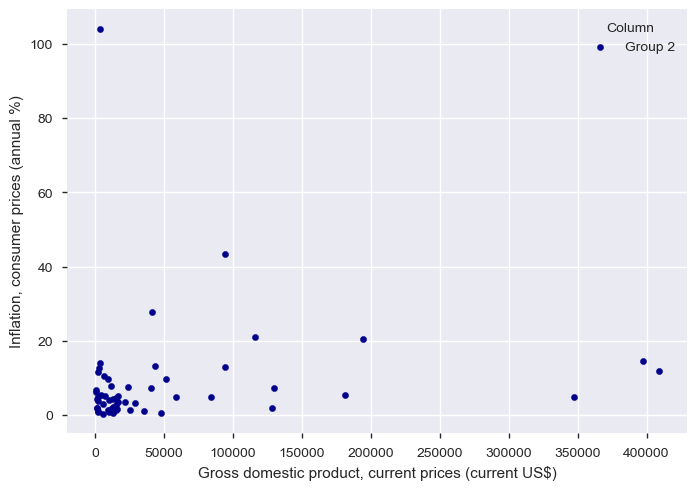

In [150]:

Pivot_scatt = Pivot[Pivot['Gross domestic product, current prices (current US$)'] < 500000]


Pivot_scatt.plot.scatter(x='Gross domestic product, current prices (current US$)', y='Inflation, consumer prices (annual %)', color='DarkBlue', label='Group 2')




In [140]:
Pivot[Pivot['Gross domestic product, current prices (current US$)'] > 500000]

Column                   Central government, Fiscal Balance (% of GDP)  \
Year Country Name                                                        
2018 Africa                                                  -4.473725   
     North Africa                                            -6.040972   
     Southern Africa                                         -4.136633   
     Sub-Saharan Africa                                      -3.923365   
     West Africa                                             -4.188200   

Column                   Central government, Fiscal Balance (Current US $)  \
Year Country Name                                                            
2018 Africa                                                  -105656.59680   
     North Africa                                             -35952.44946   
     Southern Africa                                          -24576.73632   
     Sub-Saharan Africa                                       -69696.81813   
     West Africa                                              -25644.77991   

Column                   Central government, total expenditure and net lending  (% of GDP)  \
Year Country Name                                                                            
2018 Africa                                                      24.823178                   
     North Africa                                                35.371096                   
     Southern Africa                                             30.001270                   
     Sub-Saharan Africa                                          21.239099                   
     West Africa                                                 15.427523                   

Column                   Central government, total expenditure and net lending  (Current US $)  \
Year Country Name                                                                                
2018 Africa                                                   577998.01060                       
     North Africa                                             209997.02710                       
     Southern Africa                                          178465.50280                       
     Sub-Saharan Africa                                       369677.33490                       
     West Africa                                               94464.32457                       

Column                   Central government, total revenue and grants  (% of GDP)  \
Year Country Name                                                                   
2018 Africa                                                      19.604851          
     North Africa                                                26.492682          
     Southern Africa                                             25.869753          
     Sub-Saharan Africa                                          17.286987          
     West Africa                                                 11.239324          

Column                   Central government, total revenue and grants  (Current US $)  \
Year Country Name                                                                       
2018 Africa                                                   456491.31480              
     North Africa                                             157286.18060              
     Southern Africa                                          153888.76650              
     Sub-Saharan Africa                                       300888.81490              
     West Africa                                               68819.54466              

Column                   Current account balance (As % of GDP)  \
Year Country Name                                                
2018 Africa                                          -3.048913   
     North Africa                                    -5.743092   
     Southern Africa                                 -2.905668   
     Sub-Saharan Africa               

In [142]:
Pivot[Pivot['Inflation, consumer prices (annual %)'] > 40]

Column             Central government, Fiscal Balance (% of GDP)  \
Year Country Name                                                  
2018 South Sudan                                       -1.466000   
     Sudan                                             -2.172805   

Column             Central government, Fiscal Balance (Current US $)  \
Year Country Name                                                      
2018 South Sudan                                          -58.341822   
     Sudan                                              -2046.501074   

Column             Central government, total expenditure and net lending  (% of GDP)  \
Year Country Name                                                                      
2018 South Sudan                                           26.920841                   
     Sudan                                                 11.053443                   

Column             Central government, total expenditure and net lending  (Current US $)  \
Year Country Name                                                                          
2018 South Sudan                                        36270.195978                       
     Sudan                                              10410.910720                       

Column             Central government, total revenue and grants  (% of GDP)  \
Year Country Name                                                             
2018 South Sudan                                           21.932495          
     Sudan                                                  8.880637          

Column             Central government, total revenue and grants  (Current US $)  \
Year Country Name                                                                 
2018 South Sudan                                        28799.357920              
     Sudan                                               8364.409651              

Column             Current account balance (As % of GDP)  \
Year Country Name                                          
2018 South Sudan                              -12.650000   
     Sudan                                     -2.359171   

Column             Current account balance (Net, BoP, cur. US$)  \
Year Country Name                                                 
2018 South Sudan                                    -503.427043   
     Sudan                                         -2222.033759   

Column             Exports of goods and services (% of GDP)  \
Year Country Name                                             
2018 South Sudan                                  30.261075   
     Sudan                                         4.449357   

Column             Exports of goods and services (current US$)  ...  \
Year Country Name                                               ...   
2018 South Sudan                                  37062.436356  ...   
     Sudan                                         4190.717981  ...   

Column             Gross domestic product, (constant prices US$)  \
Year Country Name                                                  
2018 South Sudan                                     5759.835572   
     Sudan                                          31186.339120   

Column             Gross domestic product, current prices (current US$)  \
Year Country Name                                                         
2018 South Sudan                                          3979.66042      
     Sudan                                               94187.04142      

Column             Household final consumption expenditure  (% of GDP)  \
Year Country Name                                                        
2018 South Sudan                                           69.949337     
     Sudan                                                 64.819429     

Column             Household final consumption expenditure (current US$)  \
Year Country Name                                                      

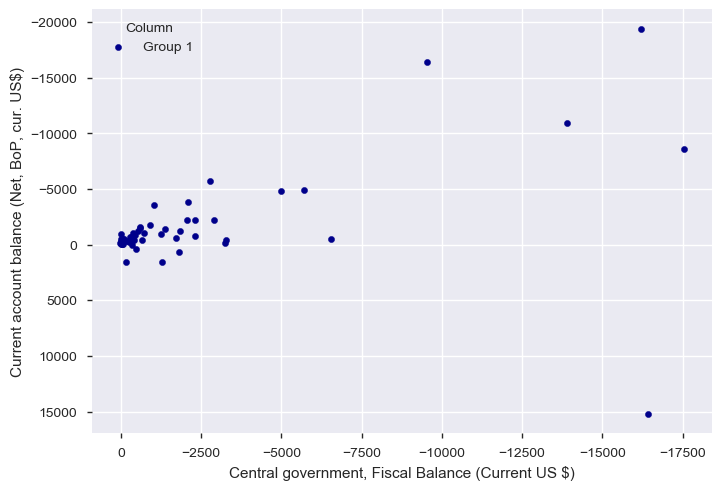

In [161]:
scatt = Pivot_scatt.plot.scatter(x='Central government, Fiscal Balance (Current US $)', y='Current account balance (Net, BoP, cur. US$)', color='DarkBlue', label='Group 1')

scatt.invert_yaxis()
scatt.invert_xaxis()


In [155]:
Pivot[Pivot['Current account balance (Net, BoP, cur. US$)'] >= 10000]



,Column,"Central government, Fiscal Balance (% of GDP)","Central government, Fiscal Balance (Current US $)","Central government, total expenditure and net lending (% of GDP)","Central government, total expenditure and net lending (Current US $)","Central government, total revenue and grants (% of GDP)","Central government, total revenue and grants (Current US $)",Current account balance (As % of GDP),"Current account balance (Net, BoP, cur. US$)",Exports of goods and services (% of GDP),Exports of goods and services (current US$),...,"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Household final consumption expenditure (% of GDP),Household final consumption expenditure (current US$),Imports of goods and services (% of GDP),Imports of goods and services (current US$),"Inflation, consumer prices (annual %)",Real GDP growth (annual %),Real per Capita GDP Growth Rate (annual %),Debt Ratio
Year,Country Name,,,,,,,,,,,,,,,,,,,,,
2018,Nigeria,-4.010889,-16411.85278,10.99016,44969.80591,6.979271,28557.95313,3.710131,15181.20349,15.665883,64102.0419,...,142253.934,409182.4434,77.055568,315297.8577,12.491031,51111.10413,11.862134,1.942723,-0.65375,4.010889


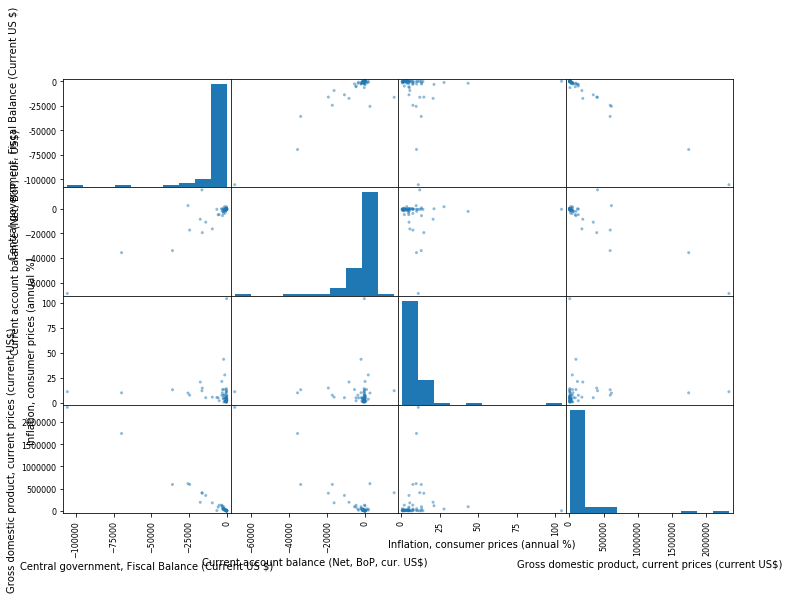

In [37]:
pd.plotting.scatter_matrix(
    Pivot_small, figsize = (12,8), grid = True
);

In [133]:

profile = pandas_profiling.ProfileReport(Pivot)

profile

Number of variables,32
Number of observations,60
Total Missing (%),0.0%
Total size in memory,15.1 KiB
Average record size in memory,257.3 B
Numeric,18
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,13


In [39]:
#agdp = af2[af2['Country Name'] == 'Africa' or af2['Country Name'] == 'Sub Saharan Africa']


gdp = af2[af2['Indicator Name'] == 'Gross domestic product, (constant prices US$)' ]
#gdp1 = gdp[gdp['Country Name'] == 'Africa' ]

#gdp[(gdp['Country Name'] == 'Africa') & (gdp['Country Name'] == 'North Africa' )]

#gdp[(gdp['Country Name'] == ['Africa', 'Sub-Saharan Africa']) ].head(3)

#and af2[af2['Country Name'] == 'North Africa' and af2[af2['Country Name'] == 'Sub Saharan Africa' and af2[af2['Country Name'] == 'West Africa' and af2[af2['Country Name'] == 'East Africa']

In [40]:
gdp1 = gdp.loc[gdp['Country Name'].isin(['Africa','North Africa', 'East Africa', 'Central Africa', 'West Africa', 'Sub-Saharan Africa'])]

In [41]:
gdp1

,Country and Region ID,Country Name,Region ID,Indicator ID,Indicator Name,Scale,Units,Year,Value,Index
1499,AFR,Africa,Africa,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,1990,4.622687e+05,1499
1528,CENTRAL,Central Africa,No ID,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,1990,2.496568e+04,1528
1557,EAST,East Africa,No ID,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,1990,3.497294e+04,1557
1586,NORTH,North Africa,No ID,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,1990,1.895521e+05,1586
1644,WEST,West Africa,No ID,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,1990,6.678953e+04,1644
1673,SSA,Sub-Saharan Africa,No ID,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,1990,2.735479e+05,1673
3202,AFR,Africa,Africa,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,1991,4.710725e+05,3202
3231,CENTRAL,Central Africa,No ID,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,1991,2.443217e+04,3231
3260,EAST,East Africa,No ID,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,1991,3.520208e+04,3260
3289,NORTH,North Africa,No ID,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,1991,1.986914e+05,3289


In [42]:
#gdp3 = gdp.loc[52499:52673	, :]
#gdp3

In [43]:
# Makes line chart of any country growth 

#gdp2 = gdp[(gdp['Country Name'] == 'Botswana') & (gdp['Year'] >= '2000')]

#gdp2.plot(x='Year', y='Value', figsize = (12,8))

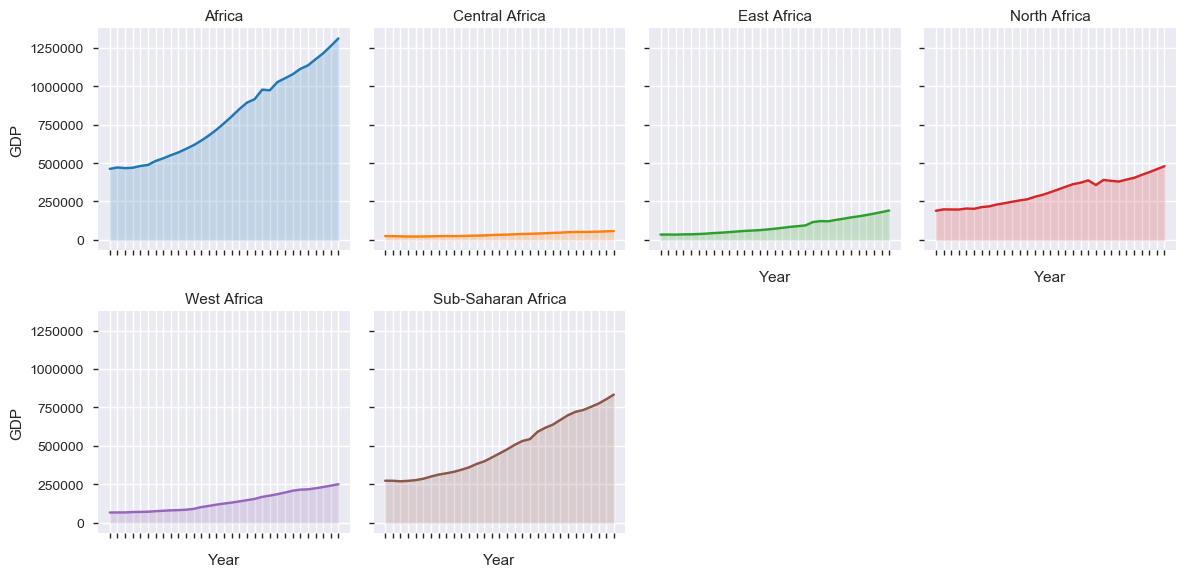

In [107]:
g = sns.FacetGrid(gdp1, col='Country Name', hue='Country Name', col_wrap=4, )
g = g.map(plt.plot, 'Year', 'Value')
g = g.map(plt.fill_between, 'Year', 'Value', alpha=0.2).set_titles("{col_name}")

g.set_ylabels("GDP")
g.set_xlabels("Year")
g.set_xticklabels(rotation=45)


In [45]:
afi2018 = afi[['Country Name', 'Region ID', 'Indicator Name', 'Scale', 'Units', '2018' ]]
gafi2018 = afi2018[afi['Indicator Name'] == 'Real GDP growth (annual %)' ]
eafi2018 = afi2018[afi['Indicator Name'] == 'Gross domestic product, (constant prices US$)' ]

In [46]:
eafi2018.sort_values(by='2018', ascending = False).head(10)

Column,Country Name,Region ID,Indicator Name,Scale,Units,2018
1528,Africa,Africa,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,1.213423e+06
1702,Sub-Saharan Africa,No ID,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,7.748885e+05
1615,North Africa,No ID,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,4.406833e+05
1644,Southern Africa,No ID,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,3.155190e+05
1673,West Africa,No ID,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,2.322557e+05
1287,South Africa,ZA,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,2.139194e+05
437,Egypt,EG,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,2.050642e+05
1586,East Africa,No ID,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,1.709502e+05
1104,Nigeria,NG,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,1.422539e+05
2,Algeria,DZ,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,1.010535e+05


In [47]:
gafi2018.head(3)

Column,Country Name,Region ID,Indicator Name,Scale,Units,2018
0,Algeria,DZ,Real GDP growth (annual %),units,percentage,2.544479
29,Angola,AO,Real GDP growth (annual %),units,percentage,-0.709417
58,Benin,BJ,Real GDP growth (annual %),units,percentage,5.957897


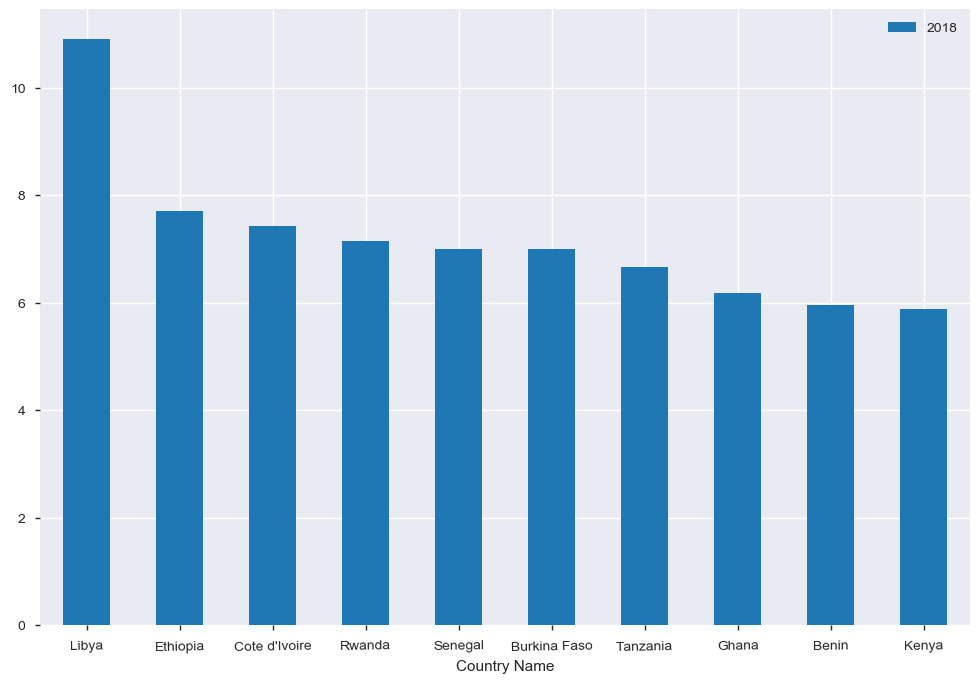

In [48]:
gafi2018.sort_values(by='2018', ascending = False).head(10).plot.bar(x='Country Name', y='2018', rot=1, figsize =(12,8))

In [49]:


lowg2018 = gafi2018[gafi2018['Country Name'] != 'Southern Africa']
lowg2018.head(3)

Column,Country Name,Region ID,Indicator Name,Scale,Units,2018
0,Algeria,DZ,Real GDP growth (annual %),units,percentage,2.544479
29,Angola,AO,Real GDP growth (annual %),units,percentage,-0.709417
58,Benin,BJ,Real GDP growth (annual %),units,percentage,5.957897


In [50]:
lg2018 = lowg2018.sort_values(by='2018', ascending = True).head(10)

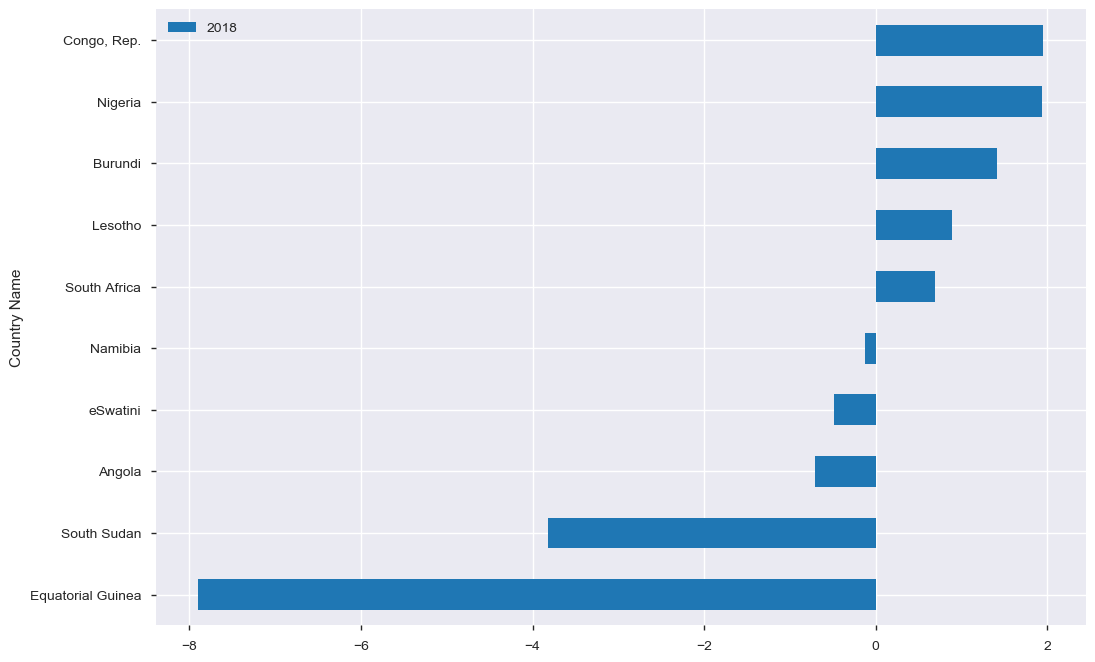

In [51]:
lg2018.plot.barh(x='Country Name', y='2018', rot=0, figsize =(12,8))


In [52]:
pafi2018 = afi2018[(afi['Indicator Name'] == 'Real per Capita GDP Growth Rate (annual %)') & (afi['Country Name'] != 'Southern Africa') ]

In [53]:
pafi2018.sort_values(by='2018', ascending = True).head(10)

Column,Country Name,Region ID,Indicator Name,Scale,Units,2018
465,Equatorial Guinea,GQ,Real per Capita GDP Growth Rate (annual %),units,percentage,-11.140654
1315,South Sudan,SS,Real per Capita GDP Growth Rate (annual %),units,percentage,-6.371229
30,Angola,AO,Real per Capita GDP Growth Rate (annual %),units,percentage,-3.903614
523,eSwatini,SZ,Real per Capita GDP Growth Rate (annual %),units,percentage,-2.215918
1045,Namibia,No ID,Real per Capita GDP Growth Rate (annual %),units,percentage,-2.205799
146,Burundi,BI,Real per Capita GDP Growth Rate (annual %),units,percentage,-1.773235
1556,Central Africa,No ID,Real per Capita GDP Growth Rate (annual %),units,percentage,-0.825773
349,"Congo, Rep.",CG,Real per Capita GDP Growth Rate (annual %),units,percentage,-0.670544
1103,Nigeria,NG,Real per Capita GDP Growth Rate (annual %),units,percentage,-0.653750
1286,South Africa,ZA,Real per Capita GDP Growth Rate (annual %),units,percentage,-0.498799


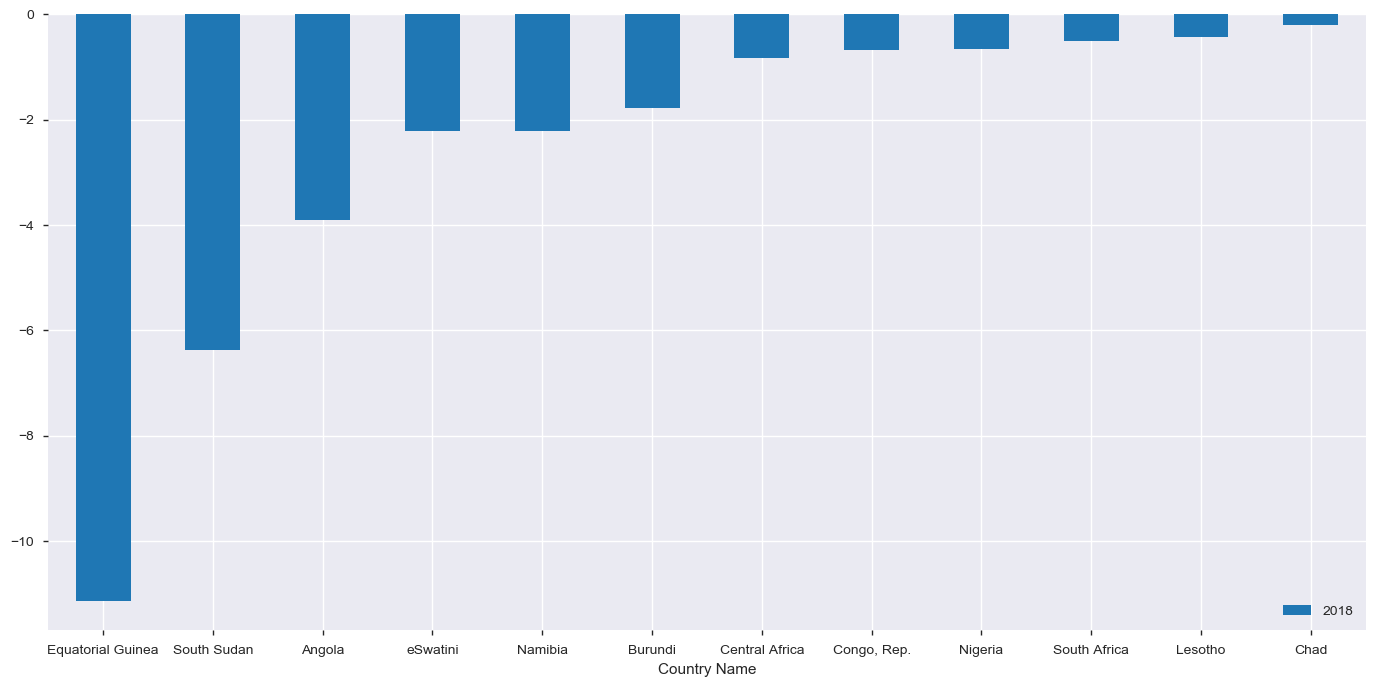

In [54]:
pafi2018.sort_values(by='2018', ascending = True).head(12).plot.bar(x='Country Name', y='2018', rot=0, figsize =(17,8));

# Investigating particular countries

In [55]:
year_col = pd.to_datetime(af2['Year'])


#mask = (af2['Int Year'] > '2000-01-01')
#af2.loc[mask]


af2['Int Year'] = year_col 
#af2.head(3)


In [56]:
eaf2 = af2[(af2['Country Name'] == 'Ethiopia') & (af2['Units'] == 'Percentage of GDP') & (af2['Int Year'] > '2015-01-01')]

In [57]:
eaf2.head(3)

,Country and Region ID,Country Name,Region ID,Indicator ID,Indicator Name,Scale,Units,Year,Value,Index,Int Year
44812,ETH,Ethiopia,ET,NE.CON.TETC.ZS,Final consumption expenditure (% of GDP),units,Percentage of GDP,2016,81.611612,44812,2016-01-01
44813,ETH,Ethiopia,ET,NE.CON.GOVT.ZS,General government final consumption expenditu...,units,Percentage of GDP,2016,11.297126,44813,2016-01-01
44814,ETH,Ethiopia,ET,NE.CON.PETC.ZS,Household final consumption expenditure (% of...,units,Percentage of GDP,2016,70.314486,44814,2016-01-01


In [58]:
eaf3 = af2[(af2['Country Name'] == 'Ethiopia') & (af2['Int Year'] > '2010-01-01') & (af2['Indicator Name'] == 'Gross capital formation (current US$)')]
eaf3

eaf4 = af2[(af2['Country Name'] == 'Ethiopia') & (af2['Int Year'] > '2010-01-01')]


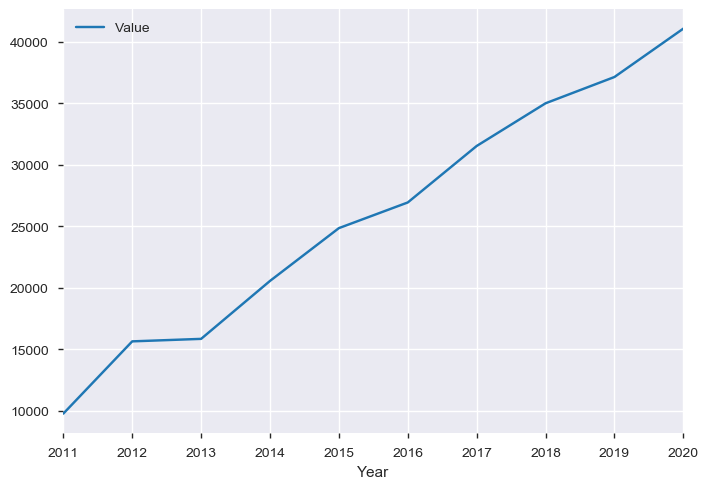

In [59]:

eaf3.plot(kind='line',x='Year',y='Value')



In [60]:
eaf4['Indicator Name'].unique()

array(['Real GDP growth (annual %)',
       'Real per Capita GDP Growth Rate (annual %)',
       'Gross domestic product, (constant prices US$)',
       'Gross domestic product, current prices (current US$)',
       'Final consumption expenditure  (current US$)',
       'General government final consumption expenditure (current US$)',
       'Household final consumption expenditure (current US$)',
       'Gross capital formation (current US$)',
       'Gross capital formation, Private sector  (current US$)',
       'Gross capital formation, Public sector  (current US$)',
       'Exports of goods and services (current US$)',
       'Imports of goods and services (current US$)',
       'Final consumption expenditure  (% of GDP)',
       'General government final consumption expenditure (% of GDP)',
       'Household final consumption expenditure  (% of GDP)',
       'Gross capital formation (% of GDP)',
       'Gross capital formation, Private sector (% GDP)',
       'Gross capital forma

In [61]:
eaf5 = eaf4.loc[eaf4['Indicator Name'].isin(['Final consumption expenditure (current US$)', 'Gross capital formation (current US$)','General government final consumption expenditure (current US$)', 'Gross capital formation (current US$)', 'Gross capital formation, Private sector  (current US$)', 'Gross capital formation, Public sector  (current US$)', 'Exports of goods and services (current US$)', 'Imports of goods and services (current US$)', 'Central government, Fiscal Balance (Current US $)', 'Current account balance (Net, BoP, cur. US$)'])]


In [62]:
eaf5.head(50)

,Country and Region ID,Country Name,Region ID,Indicator ID,Indicator Name,Scale,Units,Year,Value,Index,Int Year
36290,ETH,Ethiopia,ET,NE.CON.GOVT.CD,General government final consumption expenditu...,millions,U.S. dollars,2011,3144.936979,36290,2011-01-01
36292,ETH,Ethiopia,ET,NE.GDI.TOTL.CD,Gross capital formation (current US$),millions,U.S. dollars,2011,9786.247154,36292,2011-01-01
36293,ETH,Ethiopia,ET,NE.GDI.PVTE.CD,"Gross capital formation, Private sector (curr...",millions,U.S. dollars,2011,2379.720823,36293,2011-01-01
36294,ETH,Ethiopia,ET,NE.GDI.PUB.CD,"Gross capital formation, Public sector (curre...",millions,U.S. dollars,2011,7406.526331,36294,2011-01-01
36295,ETH,Ethiopia,ET,NE.EXPO.GNFS.CD,Exports of goods and services (current US$),millions,U.S. dollars,2011,5086.031823,36295,2011-01-01
36296,ETH,Ethiopia,ET,NE.IMP.GNFS.CD,Imports of goods and services (current US$),millions,U.S. dollars,2011,9615.055880,36296,2011-01-01
36305,ETH,Ethiopia,ET,GC.BAL.CASH.GD.CD,"Central government, Fiscal Balance (Current US $)",millions,U.S. dollars,2011,-491.897303,36305,2011-01-01
36311,ETH,Ethiopia,ET,BG.CAB.CD,"Current account balance (Net, BoP, cur. US$)",millions,U.S. dollars,2011,-746.819099,36311,2011-01-01
37993,ETH,Ethiopia,ET,NE.CON.GOVT.CD,General government final consumption expenditu...,millions,U.S. dollars,2012,3504.368044,37993,2012-01-01
37995,ETH,Ethiopia,ET,NE.GDI.TOTL.CD,Gross capital formation (current US$),millions,U.S. dollars,2012,15659.233920,37995,2012-01-01


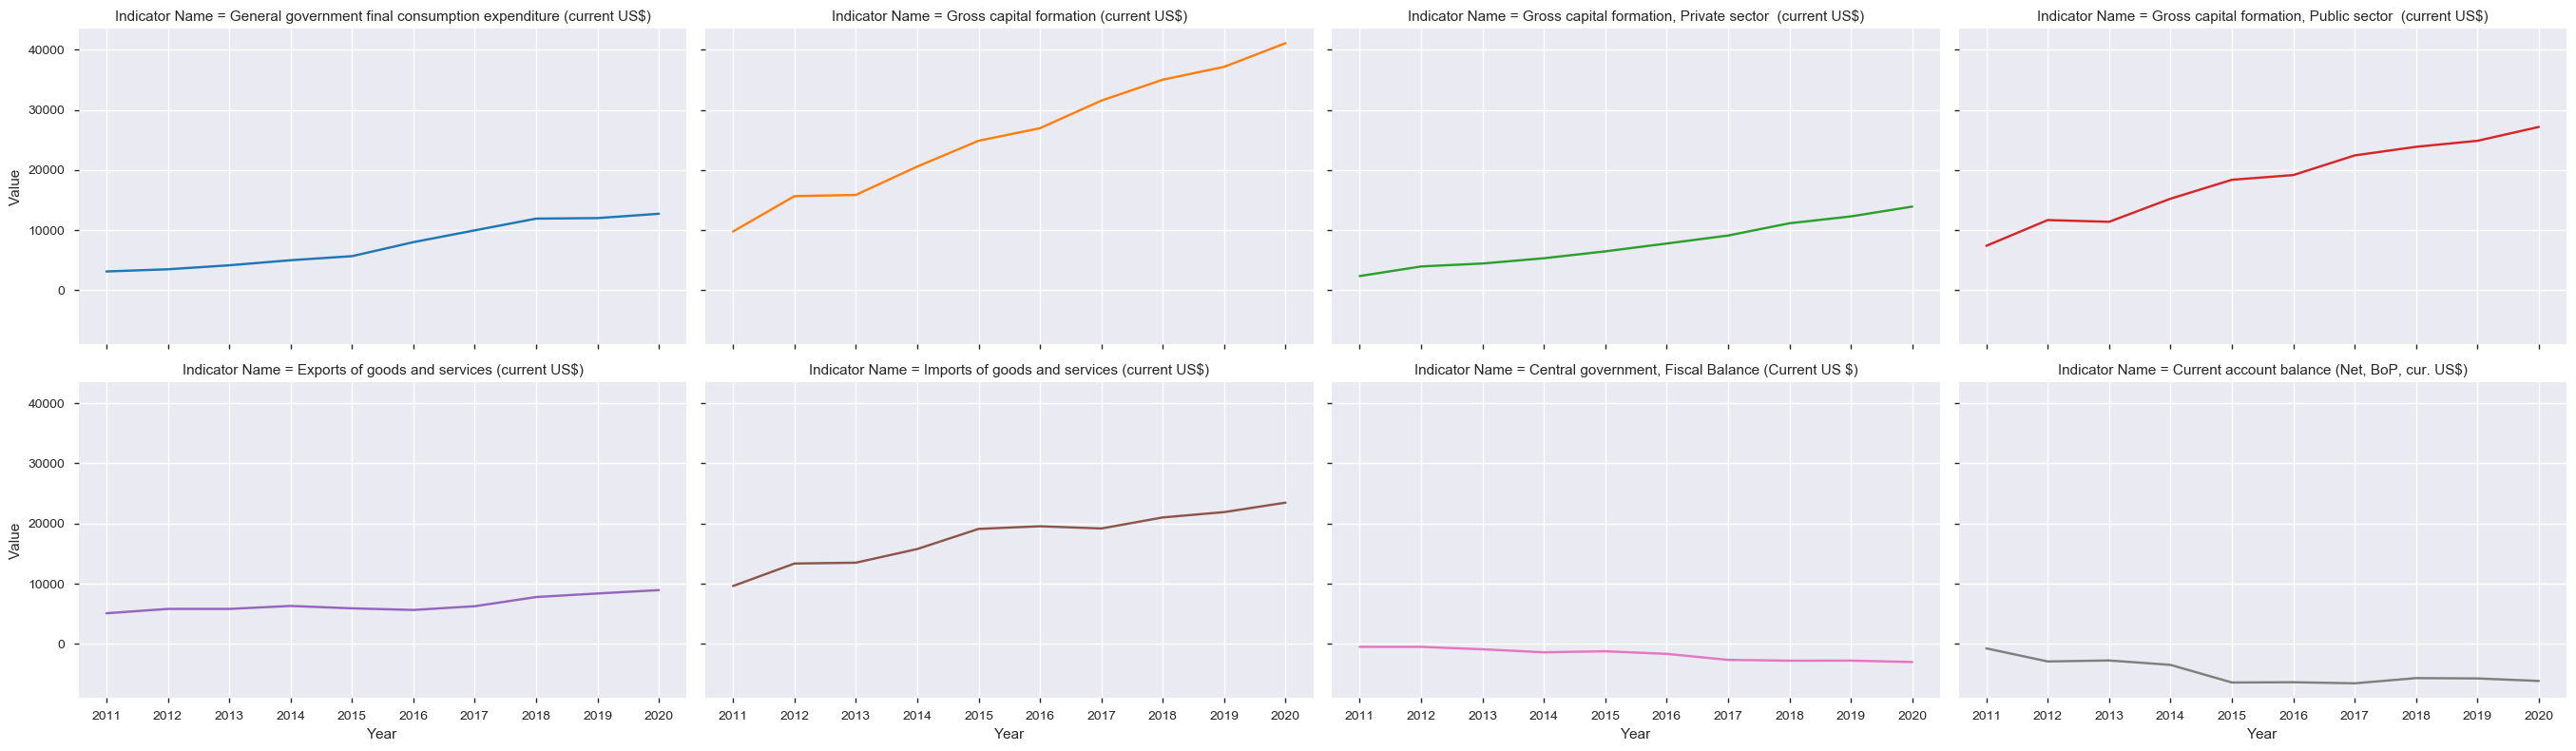

In [63]:
b = sns.FacetGrid(eaf5, col='Indicator Name', hue='Indicator Name', col_wrap=4, height =4, sharey=True, aspect=1.7 )
b = b.map(plt.plot, 'Year', 'Value')
#b = b.map(plt.fill_between, 'Year', 'Value', alpha=0.2).set_titles("{col_name}")

## Stability 

In [64]:
af2.head()

,Country and Region ID,Country Name,Region ID,Indicator ID,Indicator Name,Scale,Units,Year,Value,Index,Int Year
0,DZA,Algeria,DZ,NY.GDP.MKTP.KD.ZG,Real GDP growth (annual %),units,percentage,1990,1.251756,0,1990-01-01
1,DZA,Algeria,DZ,NY.GDP.PCAP.KD.ZG,Real per Capita GDP Growth Rate (annual %),units,percentage,1990,-1.306444,1,1990-01-01
2,DZA,Algeria,DZ,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,1990,45860.019500,2,1990-01-01
3,DZA,Algeria,DZ,NY.GDP.MKTP.CD,"Gross domestic product, current prices (curren...",millions,U.S. dollars,1990,61892.211470,3,1990-01-01
4,DZA,Algeria,DZ,NE.CON.TETC.CD,Final consumption expenditure (current US$),millions,U.S. dollars,1990,45067.010810,4,1990-01-01


In [65]:
stabil = af2[['Country Name', 'Indicator Name', 'Year','Value']]

In [66]:
stabil.head(3)

,Country Name,Indicator Name,Year,Value
0,Algeria,Real GDP growth (annual %),1990,1.251756
1,Algeria,Real per Capita GDP Growth Rate (annual %),1990,-1.306444
2,Algeria,"Gross domestic product, (constant prices US$)",1990,45860.019500


In [67]:
stabilg = stabil[stabil['Indicator Name'] == 'Real GDP growth (annual %)']

In [68]:
stabilg.head(3)

,Country Name,Indicator Name,Year,Value
0,Algeria,Real GDP growth (annual %),1990,1.251756
29,Angola,Real GDP growth (annual %),1990,-3.450099
58,Benin,Real GDP growth (annual %),1990,8.976137


In [69]:
crisis = stabilg['Value'] < 0

In [70]:
type(crisis)

pandas.core.series.Series

In [71]:
stabilg['crisis'] = crisis

/Users/Beth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
stabilg.tail(5)

,Country Name,Indicator Name,Year,Value,crisis
52645,East Africa,Real GDP growth (annual %),2020,6.070935,False
52674,North Africa,Real GDP growth (annual %),2020,4.316240,False
52703,Southern Africa,Real GDP growth (annual %),2020,2.785580,False
52732,West Africa,Real GDP growth (annual %),2020,3.596457,False
52761,Sub-Saharan Africa,Real GDP growth (annual %),2020,3.925020,False


In [73]:
crisisyears = stabilg[stabilg['crisis'] == True]

In [74]:
crisisyears.tail(10)

,Country Name,Indicator Name,Year,Value,crisis
47713,Angola,Real GDP growth (annual %),2018,-0.709417,True
48148,Equatorial Guinea,Real GDP growth (annual %),2018,-7.901889,True
48177,eSwatini,Real GDP growth (annual %),2018,-0.490103,True
48699,Namibia,Real GDP growth (annual %),2018,-0.121348,True
48969,South Sudan,Real GDP growth (annual %),2018,-3.815000,True
49851,Equatorial Guinea,Real GDP growth (annual %),2019,-2.704625,True
50672,South Sudan,Real GDP growth (annual %),2019,-2.590000,True
51438,"Congo, Rep.",Real GDP growth (annual %),2020,-0.080864,True
51554,Equatorial Guinea,Real GDP growth (annual %),2020,-2.523085,True
52375,South Sudan,Real GDP growth (annual %),2020,-2.533000,True


In [75]:
crisisyears.Year = crisisyears.Year.astype(int)

/Users/Beth/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


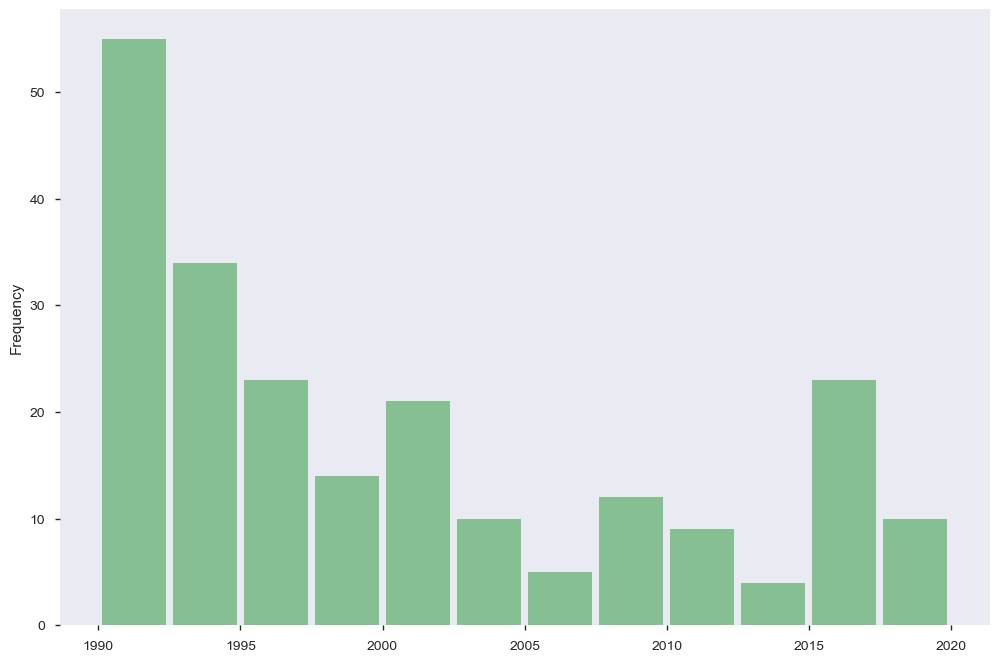

In [111]:
ax = crisisyears['Year'].plot(kind = 'hist', bins = 12, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)




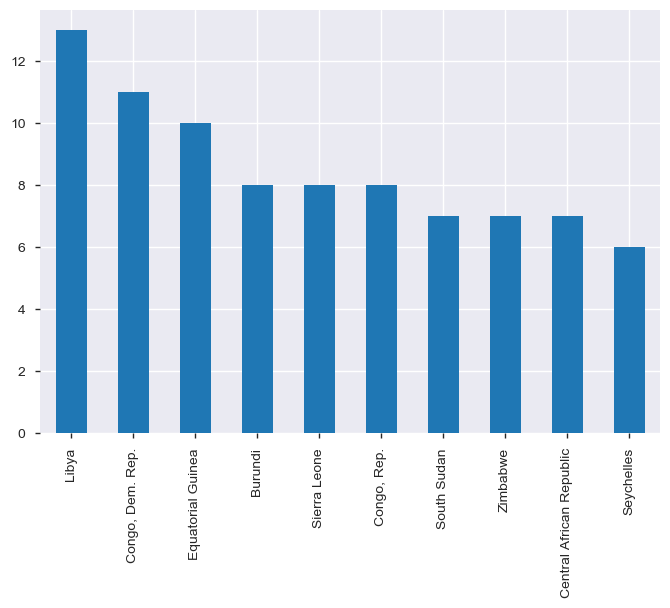

In [77]:
crisisyears['Country Name'].value_counts().head(10).plot(kind = 'bar')

In [78]:
crisisyears.head(3)

,Country Name,Indicator Name,Year,Value,crisis
29,Angola,Real GDP growth (annual %),1990,-3.450099,True
116,Burkina Faso,Real GDP growth (annual %),1990,-0.602928,True
174,Cameroon,Real GDP growth (annual %),1990,-6.161113,True


In [79]:
stabili = stabil[(stabil['Indicator Name'] == 'Inflation, consumer prices (annual %)') &  (stabil['Year'] == '1993')]



In [80]:
stabili.head(3)

,Country Name,Indicator Name,Year,Value
5137,Algeria,"Inflation, consumer prices (annual %)",1993,21.599986
5166,Angola,"Inflation, consumer prices (annual %)",1993,NaN
5195,Benin,"Inflation, consumer prices (annual %)",1993,0.440512


In [81]:
stab1993 = stabilg[stabilg['Year'] == '1993']

In [82]:
stabili.shape

(60, 4)

In [83]:
stab1993.shape

(60, 5)

In [84]:
stab = stab1993.merge(stabili, how='left', on='Country Name')

In [85]:
stab.head(5)

,Country Name,Indicator Name_x,Year_x,Value_x,crisis,Indicator Name_y,Year_y,Value_y
0,Algeria,Real GDP growth (annual %),1993,-2.102489,True,"Inflation, consumer prices (annual %)",1993,21.599986
1,Angola,Real GDP growth (annual %),1993,-23.983417,True,"Inflation, consumer prices (annual %)",1993,NaN
2,Benin,Real GDP growth (annual %),1993,5.836172,False,"Inflation, consumer prices (annual %)",1993,0.440512
3,Botswana,Real GDP growth (annual %),1993,4.026572,False,"Inflation, consumer prices (annual %)",1993,15.183002
4,Burkina Faso,Real GDP growth (annual %),1993,3.461385,False,"Inflation, consumer prices (annual %)",1993,0.618581


In [86]:
#stab['Value_y'].fillna((stab['income'].mean()), inplace=True)

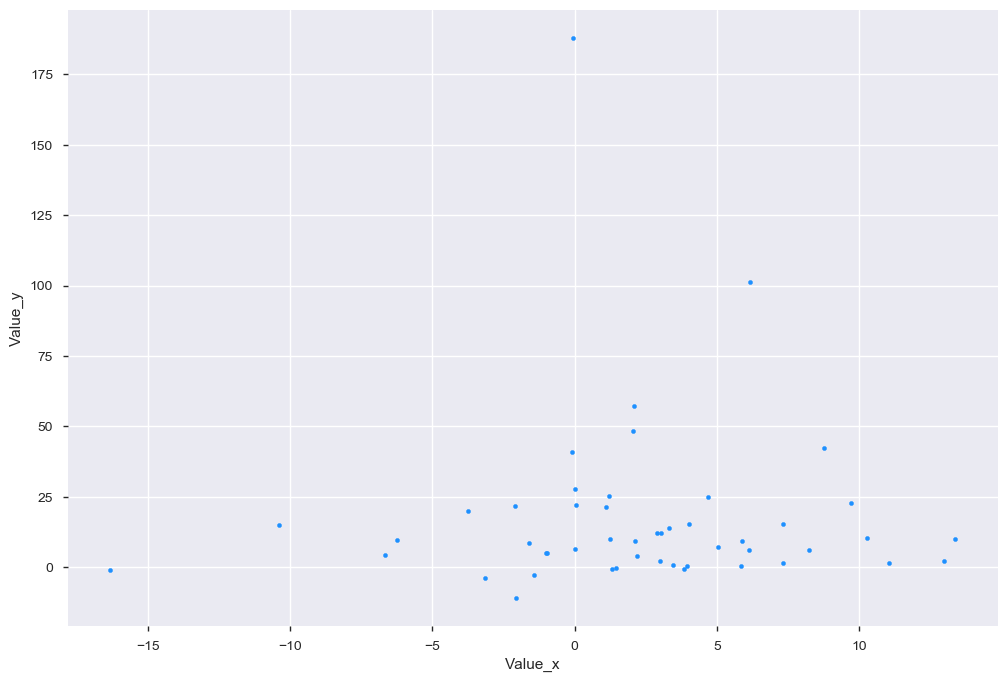

In [87]:
stab.plot(kind='scatter', x='Value_x', y='Value_y', \
         figsize=(12,8), s=9, color='dodgerblue' );

In [88]:
stabi = stab[['Country Name', 'Indicator Name_y', 'Value_y']]


stabi [ stabi['Value_y'] > 175 ]

,Country Name,Indicator Name_y,Value_y
51,Zambia,"Inflation, consumer prices (annual %)",188.053727


In [89]:

# cs[['Product Type', 'GrossSales']].groupby('Product Type').sum() \
#                                   .apply(lambda x: x/1000000) \
#                                   .sort_values(by='GrossSales', ascending=False) \
#                                   .head(10) \
#                                   .plot(kind='bar', figsize=(10,5))

# plt.ylabel('Gross Sales [MM $USD]')
# plt.title('Sales [MM $USD] by Product Type');



In [90]:
Pivot.head(2)

Column             Central government, Fiscal Balance (% of GDP)  \
Year Country Name                                                  
2018 Africa                                            -4.473725   
     Algeria                                           -5.252995   

Column             Central government, Fiscal Balance (Current US $)  \
Year Country Name                                                      
2018 Africa                                           -105656.596800   
     Algeria                                            -9526.543363   

Column             Central government, total expenditure and net lending  (% of GDP)  \
Year Country Name                                                                      
2018 Africa                                                24.823178                   
     Algeria                                               39.959000                   

Column             Central government, total expenditure and net lending  (Current US $)  \
Year Country Name                                                                          
2018 Africa                                             577998.01060                       
     Algeria                                             72467.44181                       

Column             Central government, total revenue and grants  (% of GDP)  \
Year Country Name                                                             
2018 Africa                                                19.604851          
     Algeria                                               34.706004          

Column             Central government, total revenue and grants  (Current US $)  \
Year Country Name                                                                 
2018 Africa                                             456491.31480              
     Algeria                                             62940.89845              

Column             Current account balance (As % of GDP)  \
Year Country Name                                          
2018 Africa                                    -3.048913   
     Algeria                                   -9.049960   

Column             Current account balance (Net, BoP, cur. US$)  \
Year Country Name                                                 
2018 Africa                                        -68690.64764   
     Algeria                                       -16412.50916   

Column             Exports of goods and services (% of GDP)  \
Year Country Name                                             
2018 Africa                                       25.044891   
     Algeria                                      25.013565   

Column             Exports of goods and services (current US$)  ...  \
Year Country Name                                               ...   
2018 Africa                                       578625.91270  ...   
     Algeria                                       45363.22462  ...   

Column             Gross capital formation, Public sector (% GDP)  \
Year Country Name                                                   
2018 Africa                                              9.905441   
     Algeria                                            32.003596   

Column             Gross domestic product, (constant prices US$)  \
Year Country Name                                                  
2018 Africa                                         1.213423e+06   
     Algeria                                        1.010535e+05   

Column             Gross domestic product, current prices (current US$)  \
Year Country Name                                                         
2018 Africa                                             2.328461e+06      
     Algeria                                            1.813545e+05      

Column             Household final consumption expenditure  (% of GDP)  \
Year Country Name                                                        
2018 Africa        

In [102]:
Pivot['Debt Ratio'] = Pivot['Central government, Fiscal Balance (Current US $)'].abs() / Pivot['Gross domestic product, current prices (current US$)'] * 100

Pivot.head(3)


Column             Central government, Fiscal Balance (% of GDP)  \
Year Country Name                                                  
2018 Africa                                            -4.473725   
     Algeria                                           -5.252995   
     Angola                                            -2.787864   

Column             Central government, Fiscal Balance (Current US $)  \
Year Country Name                                                      
2018 Africa                                           -105656.596800   
     Algeria                                            -9526.543363   
     Angola                                             -3239.837972   

Column             Central government, total expenditure and net lending  (% of GDP)  \
Year Country Name                                                                      
2018 Africa                                                24.823178                   
     Algeria                                               39.959000                   
     Angola                                                19.464710                   

Column             Central government, total expenditure and net lending  (Current US $)  \
Year Country Name                                                                          
2018 Africa                                             577998.01060                       
     Algeria                                             72467.44181                       
     Angola                                              22620.36323                       

Column             Central government, total revenue and grants  (% of GDP)  \
Year Country Name                                                             
2018 Africa                                                19.604851          
     Algeria                                               34.706004          
     Angola                                                16.676846          

Column             Central government, total revenue and grants  (Current US $)  \
Year Country Name                                                                 
2018 Africa                                             456491.31480              
     Algeria                                             62940.89845              
     Angola                                              19380.52526              

Column             Current account balance (As % of GDP)  \
Year Country Name                                          
2018 Africa                                    -3.048913   
     Algeria                                   -9.049960   
     Angola                                    -0.115907   

Column             Current account balance (Net, BoP, cur. US$)  \
Year Country Name                                                 
2018 Africa                                       -68690.647640   
     Algeria                                      -16412.509160   
     Angola                                         -134.698038   

Column             Exports of goods and services (% of GDP)  \
Year Country Name                                             
2018 Africa                                       25.044891   
     Algeria                                      25.013565   
     Angola                                       33.528666   

Column             Exports of goods and services (current US$)  ...  \
Year Country Name                                               ...   
2018 Africa                                       578625.91270  ...   
     Algeria                                       45363.22462  ...   
     Angola                                        38964.39216  ...   

Column             Gross domestic product, (constant prices US$)  \
Year Country Name                                                  
2018 Africa                                         1.213423e+06   
     Algeria                                        1.010535e+05   
   

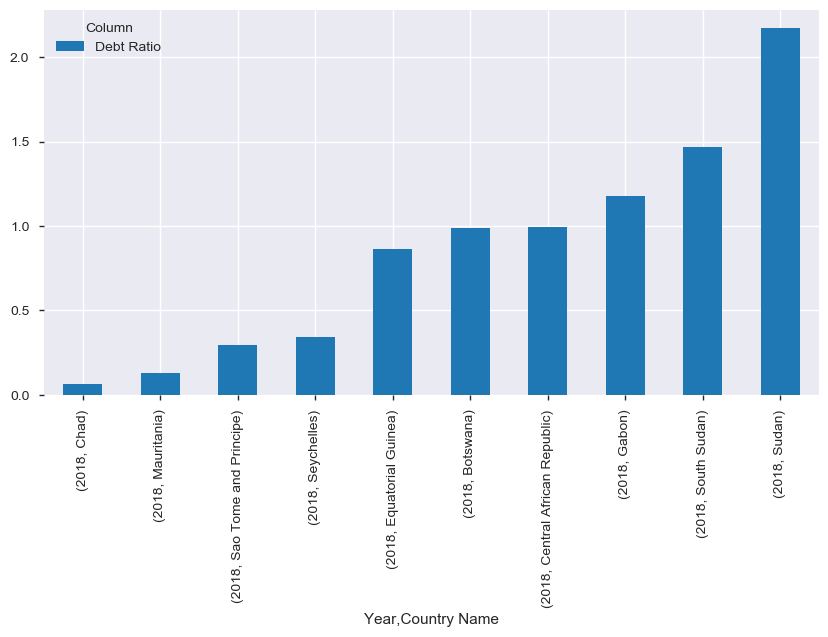

In [105]:
Pivot[['Debt Ratio']] \
                                  .sort_values(by='Debt Ratio', ascending=True) \
                                  .head(10) \
                                  .plot(kind='bar', figsize=(10,5))